In [1]:
!pip install imblearn

# to enable plotting graphs in our notebook
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# since it is a dtata file with no header, we will supply the column names which have been obtained from the above url
# create a python list of column names called names

colnames = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "Class"]

In [4]:
pima_df = pd.read_csv("pima-indians-diabetes.data", names = colnames)
pima_df.head(9)

,preg,plas,pres,skin,test,mass,pedi,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


In [5]:
# the last column the class column is a target column defines that whether the person is diabetic or not

## let us check weather any of the column has any value other than numeric i.e, data is not corrupted such as "?" instead of
## a number

## we use np.isreal a numpy function which check each column for each row and returns a bool array
## where true if input element is a real
## apply map is a pandas dataframe functionthat applies the np.isreal function columnwise
## following lines select those rows which has some non-numeric values in any of the column hence the ~ symbol

In [6]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,Class


In [7]:
# the o/p indicate that there is no non numeric values hidden in any of the columns

## replace the missing values in pima_df with median value. NOTE : we do not need to specify column names

## every column's missing value is replaced with that column's median respectively

## pima_df = pima_df.fillna(pima_df.median())

## pima_df

In [8]:
# Let us analyze the distribution of the various attributes

pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# let us look at the target columns which is the "class" to understand how the data is distributed amongst various values 

pima_df.groupby(["Class"]).count()

# most of them are not diabetic. The ratio is almost 1:2 in favor or class 0. the model's ability to predict class 0 will
# be better then predicting class 1

,preg,plas,pres,skin,test,mass,pedi,age
Class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


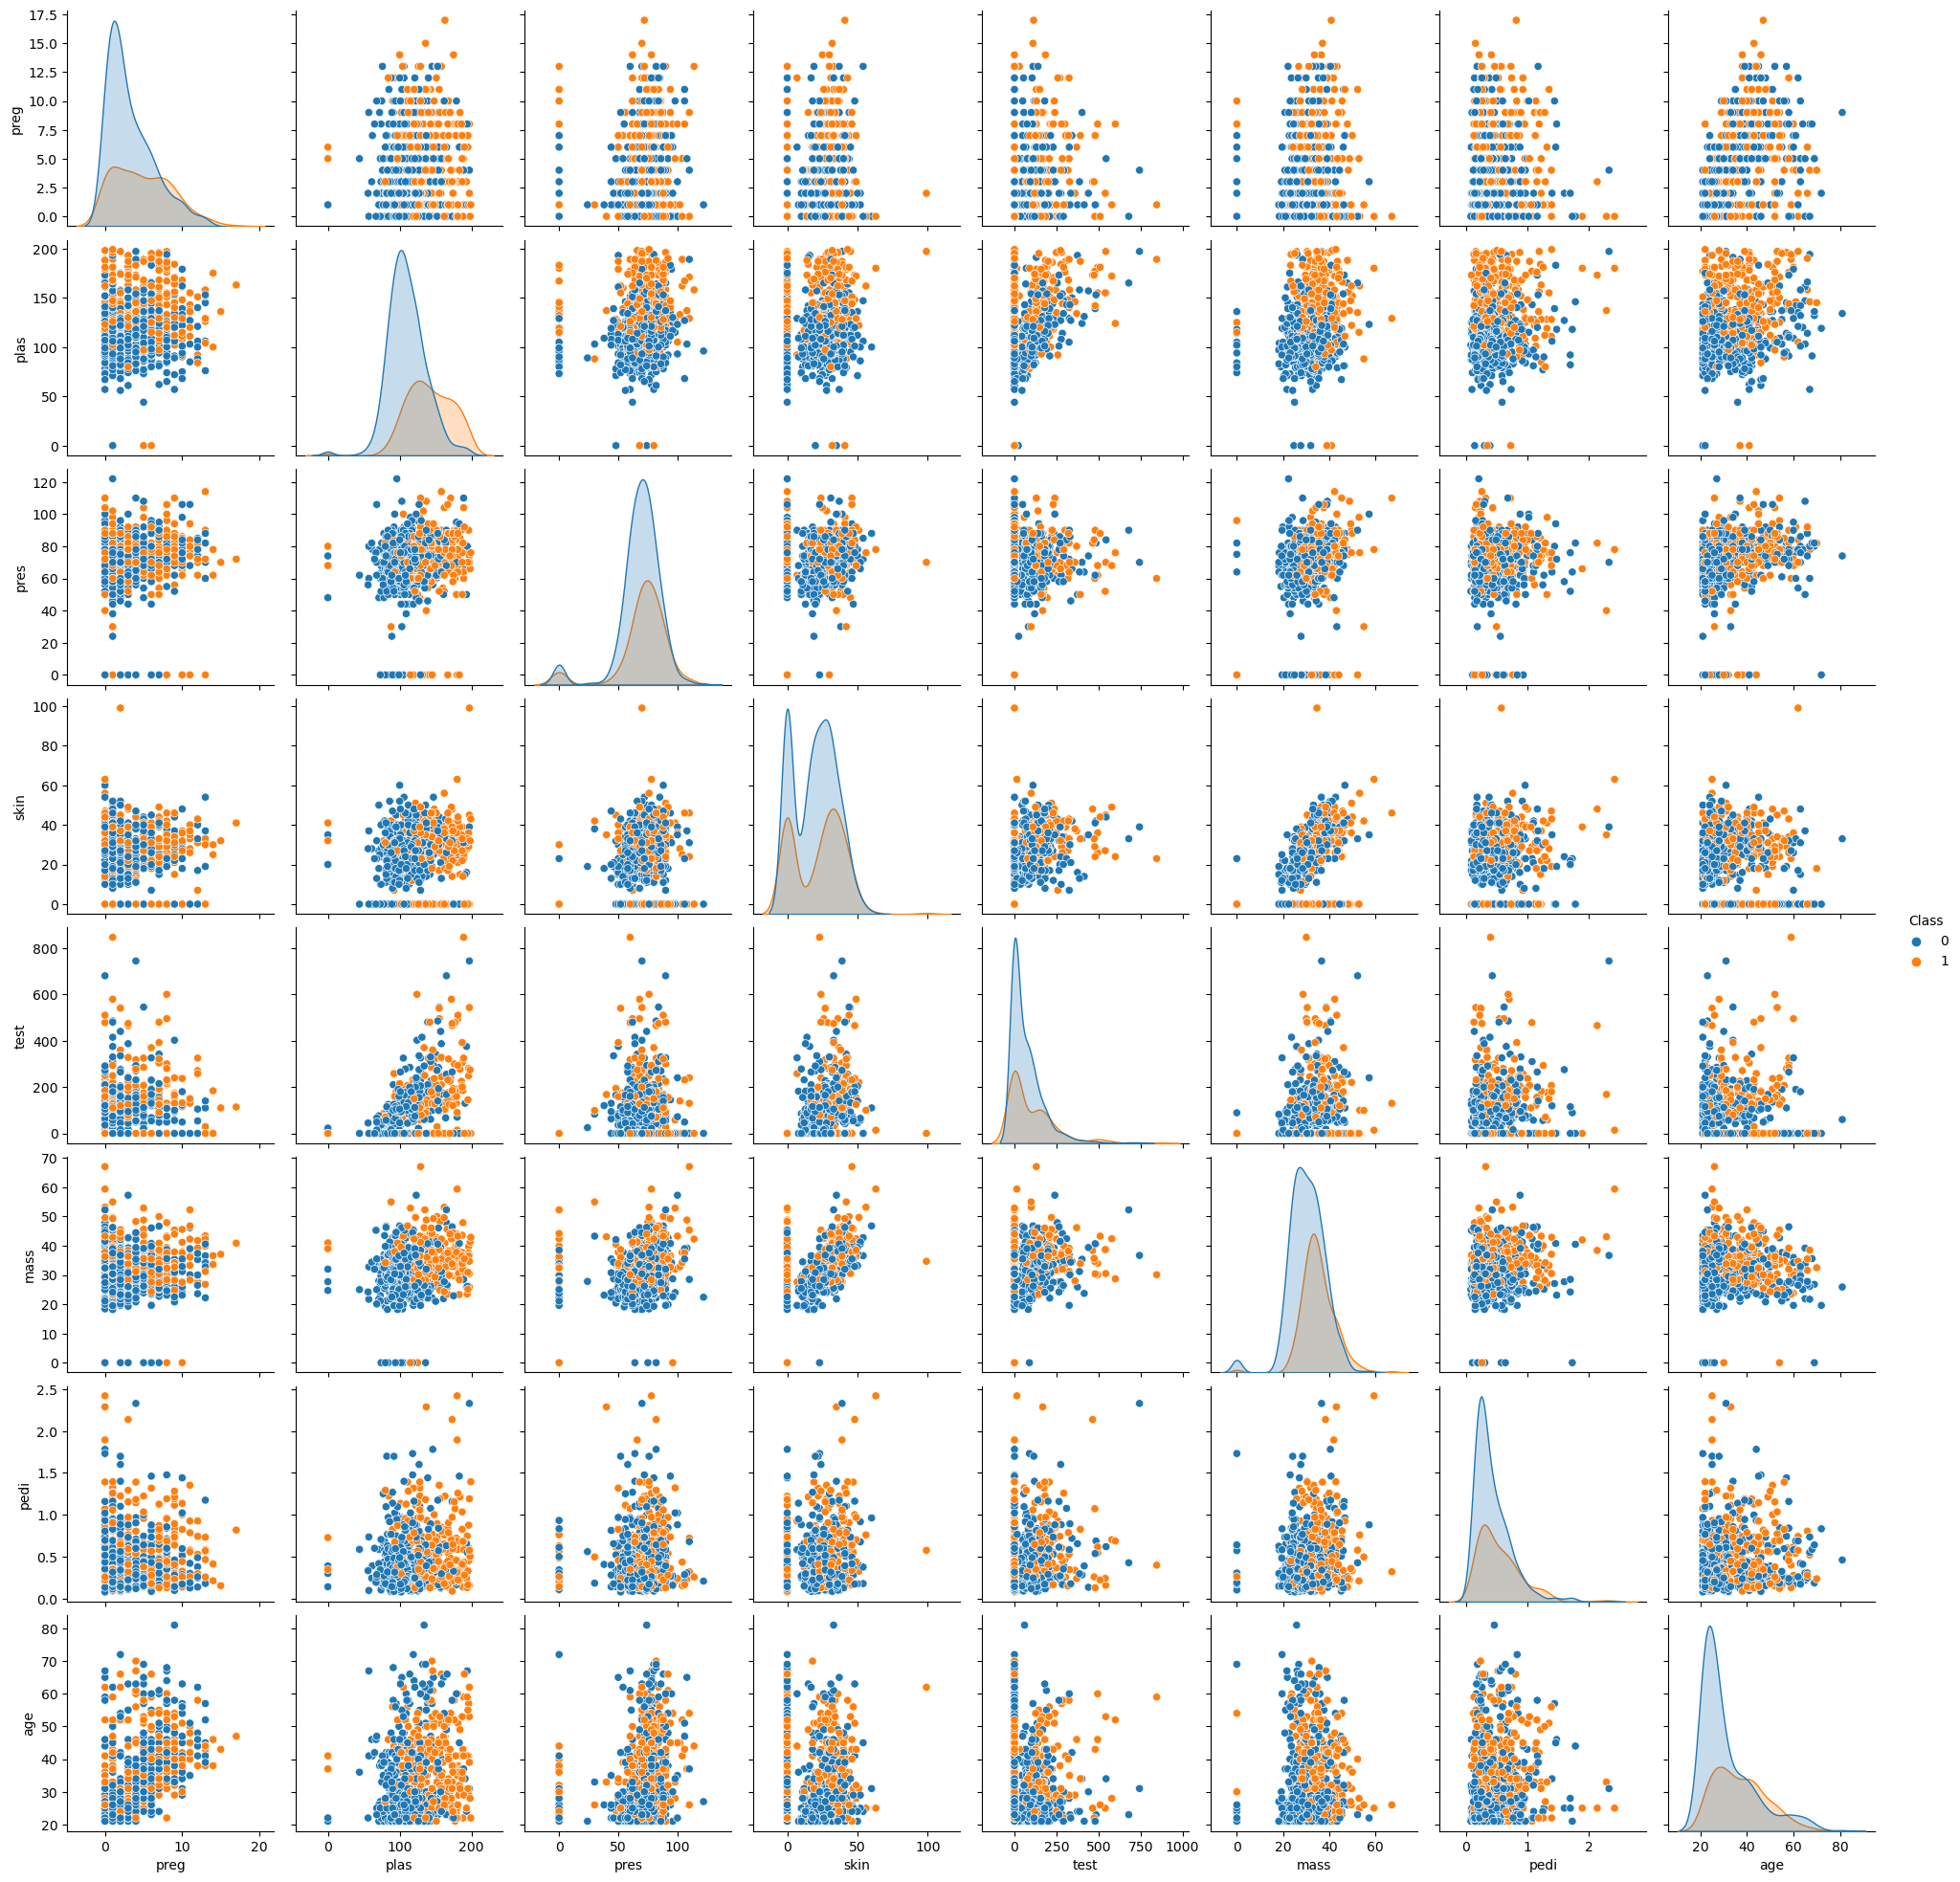

In [11]:
## pair plot using sns 

sns.pairplot(pima_df, hue = "Class", diag_kind = "kde");

# ORANGE --> DIABETIC CLASS
# BLUE       --> NON-DIABETIC CLASS


## the col related to blood_pressure both the orange and the blue are over lapping 
## orange means --> 1 (the dibatic class )
## and
## blue means -- > 0 (the non - diabetic class

## both the classes are overlapping completely they are eclipsing each other 

## such attribute they are unable to discremenate among the two classes / they are unable to differenciate b/w the two classes 

## for any range of values on these attributes such as blood_pressure 

## the probability of finding diabetic and non diabetic is equal.

## such attributes are not good attributes from classification point of view 

## next we see the skin the two we see are almost overlapping. And hence this particular attribute is unable to distinguish b/w diabetic and non-diabetic(orange and the blue)

## if we notice the first two both the pregnency and plasma they are not eclippging each other they are overlapping significantly, but there are certain value of plasma for which the density of orange is higher then blue 

## similarly for certain value of pregnancy the density distribution of the orange class the diabetic class is higher then the density distribution of the non-diabetic class (blue one)

## so here what we notice in the pairplot most of the attributes the distributions are overlapping with slight difference these attributes are going to be week predictors.

## whereas these attributes where the attribute is complete -- they are going to be poor predictors

# -----------------------------===================================================-----------------------------------------

## when we do classification first diagnose the diagonals 

## understand which attributes are likely to be good attributes and which attributes are likely to be week attribute.

## come to the scatter plots above the diagnols and below the diagonals are same they are mirror images so we can focus on any one
## long tails indicate the presence of potential outliers -- any outlier can bring a model on knees 


## --------------------------------------------------------------------------------------------------------------

## always use this to classify which attributes are likely to be more important then others in our classification 

## we are seeing here is most of the attributer such as -- blood_pressure or the skin test become useless for classification

## as both blue (non-d) and orange(d) completely overlapp each other --
## -- which means for the given value of x the probability of finding orange(d) and blue(non-d) is almost sme 50-50% 

## what we want is we want attributes on which the two classes are seperated out significantly 

## so that for given value of x the density of finding value of blue(non-d) is higher then orange(d) for other value of x the density of orange(d) is higher then the blue(non-d). 

In [13]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right

In [14]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.

In [15]:
array = pima_df.values

X = array[:,0:8] ## select all rows and first 8 columns which are the attributes 

y = array[:,8] ## select all rows and the 8th column which is the classification "Yes", "No" for diabeties.

test_size = 0.30 ## taking 70:30 training and test set 

speed = 7 ## the random state seeding for repeatibility of the code 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = speed)

type(X_train)

numpy.ndarray

In [17]:
# fit the model on original data i.e before upsampling 

model = LogisticRegression()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)

print(model_score)

print("")

print(metrics.confusion_matrix(y_test, y_predict))

print("")

print(metrics.classification_report(y_test, y_predict))

0.7532467532467533

[[127  20]
 [ 37  47]]

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.82       147
         1.0       0.70      0.56      0.62        84

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


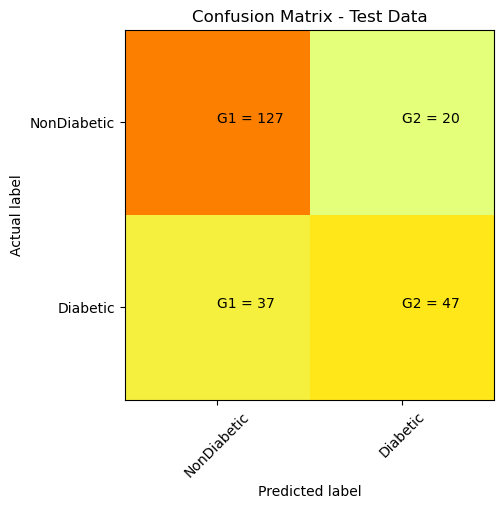

In [25]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Wistia)
classNames = ["NonDiabetic", "Diabetic"]
plt.title("Confusion Matrix - Test Data")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)

s = [["G1", "G2"], ["G1", "G2"]]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show();